# Parameter study for the weights of income from agriculture and ecosystem services

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

test = False

path = '/home/jakob/Project_MayaSim/Python/output_data/X7_eco_income/results/trajectory'
if test:
    path = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X7_eco_income/results/trajectory'

data = pd.read_pickle(path)
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))

def plotlines(data, level, key, unstack):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls)
    lg = ln.get_legend()
    bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
    xOffset = .5
    bb.x0 += xOffset
    bb.x1 += xOffset
    lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)
    
data.head()

Populating the interactive namespace from numpy and matplotlib


/home/jakob/anaconda3/envs/core/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


key                                                    mean_trajectories  \
r_bca r_eco  kill_cropless timesteps observables                           
0.1   0.0001 False         0         max_AG                   754.058707   
                                     max_ES                   187.356360   
                                     max_bca                 1075.800785   
                                     max_cluster_size           1.000000   
                                     max_npp                 2436.457401   

key                                                    sigma_trajectories  
r_bca r_eco  kill_cropless timesteps observables                           
0.1   0.0001 False         0         max_AG                           0.0  
                                     max_ES                           0.0  
                                     max_bca                          0.0  
                                     max_cluster_size                 0.0  
                                     max_npp                          0.0

First, as allways, have a look at population and number of settlements to get a feeling for the overshoot and collapse behavior of the model under different conditions

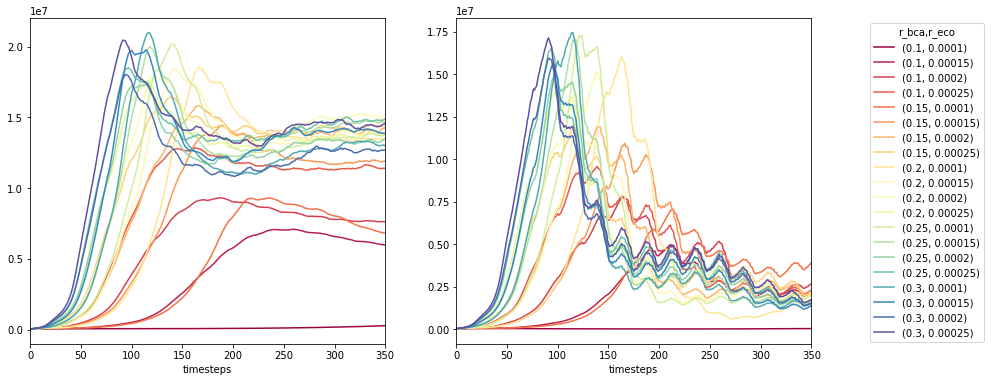

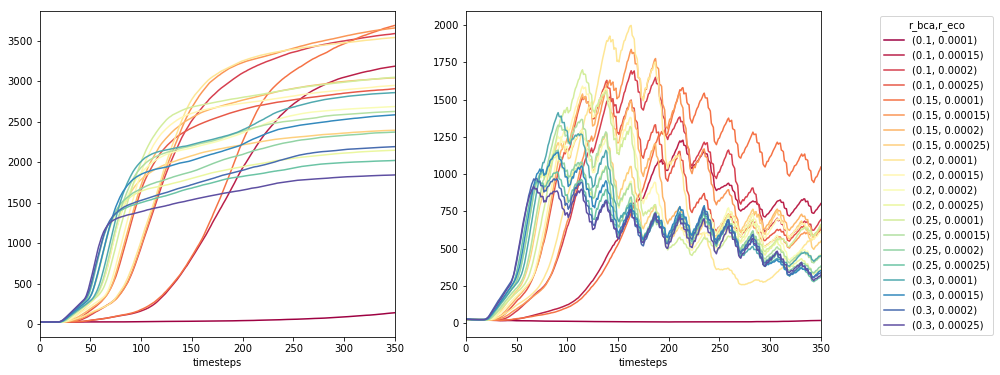

In [3]:
key=[False, 'total_population']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

key=[False, 'total_settlements']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

Turns out, killing of cities without crops obviously makes a huge difference. Leaving cities without crops alive leads to significantly less pronounced overshoot and collapse behavior in population and no collapse in number of settlements. Although I wonder, if settlements do propperly die from low population.

The different sources of income are shown below:

Agriculture Income does not differ between the conditions. Ecosysten and trade income do.

It is visible, that for none of the tested parameters the climate variability signature does not show in the trade income, if cities without crops remain alive.

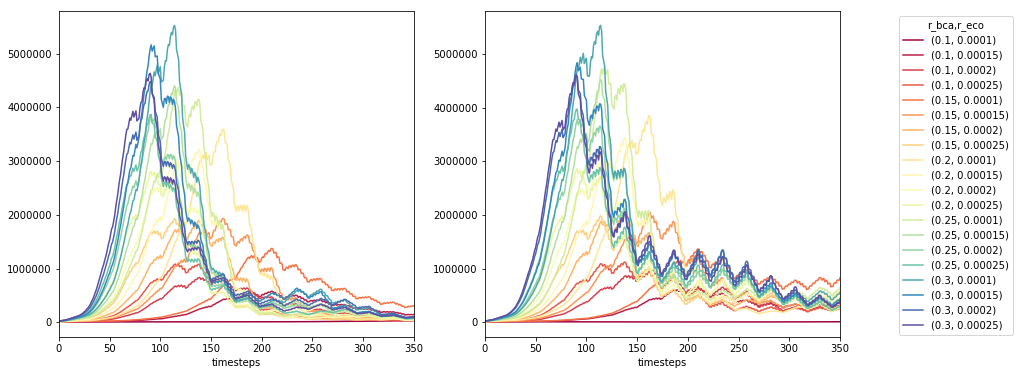

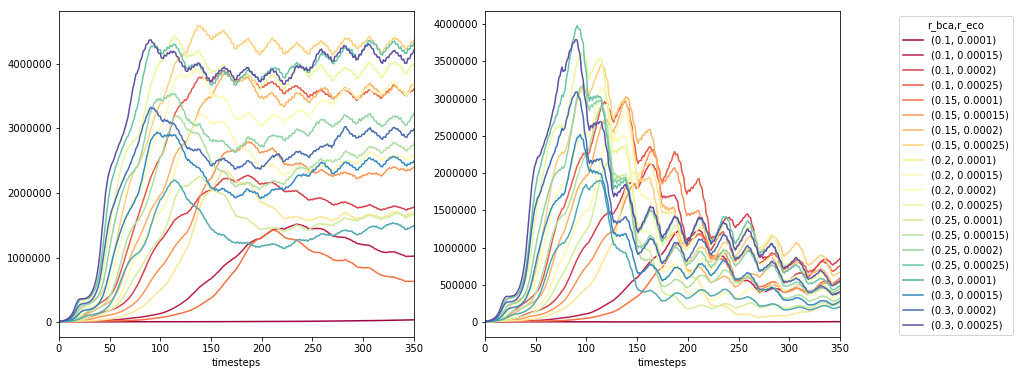

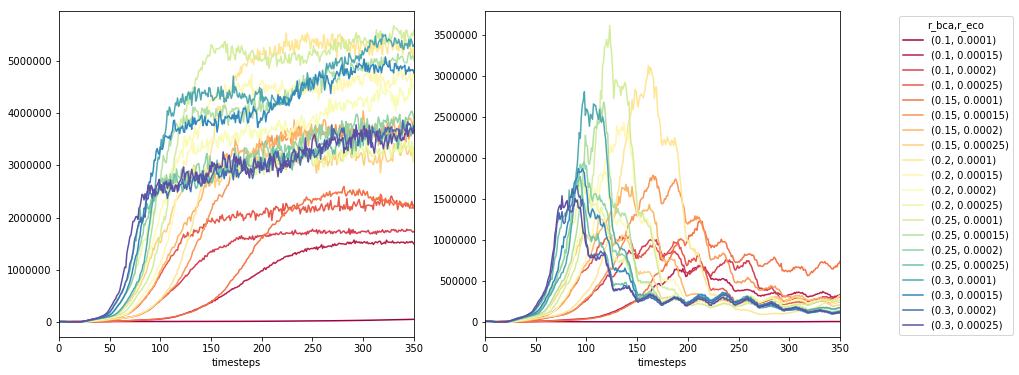

In [3]:
key=[False, 'total_income_agriculture']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

key=[False, 'total_income_ecosystem']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

key=[False, 'total_income_trade']
level=['kill_cropless', 'observables']
unstack = ['r_bca', 'r_eco']

plotlines(data, level, key, unstack)

**All of this leaves me wondering, if trade links are removed propperly if cities population shrinks.
It looks as if trade links only vanish if settlements die. Check this!**

It turned out, that the trade links if fact did't vanish from decrease inpopulation. I then corrected this in the model such that settlements maintain the trade links that they actively established and once they drop below the threshold to maintain them, they abandon the link to the smallest settlement.

It turned out also, that that did not make any notable difference in the results, which leads me to believe, that settlements don't shrink, once they established trade links.
I therefore will look at aggregated quatities of trading settlements only, to get more insight.

**Finally, from this parameter scan, a good set for r_bca and r_eco seems to be (0,25, 0.0002). This will be used in future experiments.**